<H1><B>Emergency-911</B></H1>
<p><span><h3>you can fetch the data set from <a href="https://www.kaggle.com/mchirico/montcoalert">kaggle</h3></a></span></p>
<p><h3> the data contains the following:-</h3><p>
<ul>
    <li>lat:String variable,lattiude</li>
    <li>lng:String variable,longitude</li>
    <li>desc:String variable,Description of the emergency call</li>
    <li>zip:String variable,zipcode</li>
    <li>title:String variable,Title</li>
    <li>timeStamp:String variable,YYYY-MM-DD HH:MM:SS</li>
    <li>twp:String variable,Township</li>
    <li>addr:String variable,address</li>
    <li>e:String variable,dummy variable(always 1)</li>
</ul>

<h1>DATA AND SETUP</h1>

<h4> import numpy and pandas</h4>

In [8]:
import numpy as np
import pandas as pd

<h4> import visulization libararies and set %matplotlib inline</h4>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h4>Read in the csv file as a data frame called df</h4>

In [11]:
df=pd.read_csv('911.csv')

 <h4> Check the info() of the df</h4>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


<h4>Check the head or tail of the df</h4>

In [15]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<B><h1>Basic Questions</h1></B>

<h4> What are the top 5 zipcode for 911 calls?</h4>

In [17]:
df['zip'].value_counts().head()

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

<h4> What are the top 5 townships for 911 calls?</h4>

In [18]:
df['twp'].value_counts().head()

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

<h4> Take a look at the title column, how many unique title codes are there?</h4>

In [19]:
df['title'].unique()
#len(df['title'].unique())

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

<h2><b>Creating new features</b></h2>
<br>
<p>In thw titles column there are "reasons/Departments" specified before the title code.
These are EMS, Fire and Traffic.Use .apply() with a custom lambda expression to create a new
column called "reasons" that contains this string value</p>

<p>for example, if the title column value is EMS:Back pains/INJURY, the reason column 
    value would be <u>EMS</u></p>

In [21]:
x=df['title'].iloc[0]
x.split(':')[0]

'EMS'

In [22]:
df['Reason']=df['title'].apply(lambda title:title.split(':')[0])

In [23]:
df['Reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
           ...   
663517    Traffic
663518        EMS
663519        EMS
663520       Fire
663521    Traffic
Name: Reason, Length: 663522, dtype: object

<h4> What is the most common Reasons for a 911 call based off this new column?</h4>

In [24]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

<h4> Use seaborn to create a countplot of 911 calls by reasons</h4>

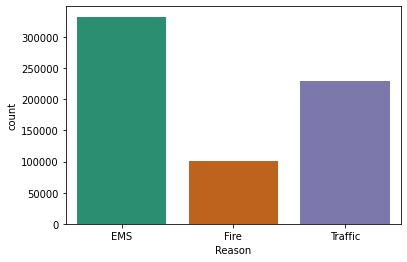

In [29]:
sns.countplot(x='Reason',data=df,palette='Dark2')
#viridis

<h4> Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?</h4>

In [31]:
 type(df['timeStamp'].iloc[0])

str

<h4>use pd to datetime to convert the column from strings to DateTime objects.</h4>

In [34]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

<h4> Now that the timeStamp column are actually DateTime objects,use .apply() to create 3 new columns called Hour, Month , and Day of Week. you will create these columns based off of the timeStamp column</h4>

In [35]:
time=df['timeStamp'].iloc[0]
time.hour

17

In [36]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [37]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,3


<h4> Day of Week is an integer from 0-6. map it to string names to the day of week:</h4>

In [38]:
day_map={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(day_map)

<h4> Use seaborn to create a count plot of the day of week column with the hue based off of the reason column</h4>

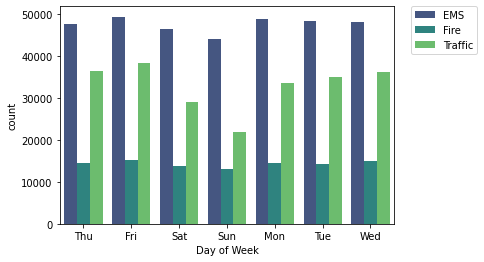

In [42]:
sns.countplot(x='Day of Week',data=df, hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

<h4> Now do the same for month:</h4>

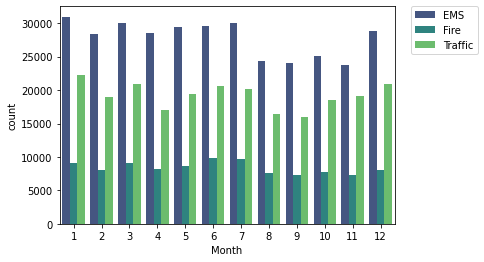

In [43]:
sns.countplot(x='Month',data=df, hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

<h4> creating a group by object called bymonth, where you group the DataFrame by the month column and use the count() method for aggregation. use the head() method on this returned DataFrame.</h4>

In [47]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Day of Week
Month,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027
4,53671,53671,53671,47349,53671,53671,53655,53671,53671,53671,53671,53671
5,57509,57509,57509,50354,57509,57509,57474,57509,57509,57509,57509,57509


<h4> Simple plot off of the dataframe indicating he count of calls per month</h4>

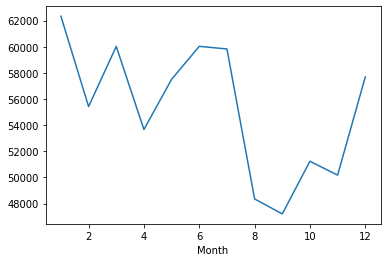

In [48]:
byMonth['lat'].plot()

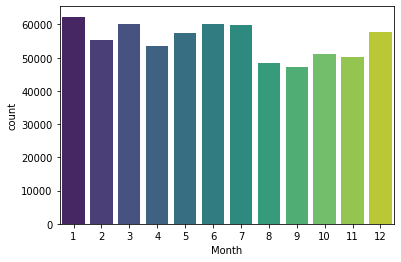

In [50]:
sns.countplot(x='Month',data=df,palette='viridis')
#plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

<h4> use Seaborn's implot() to create a linear fit on the number of calls per month.Keep in mind you may need to reset the index to a column.</h4>

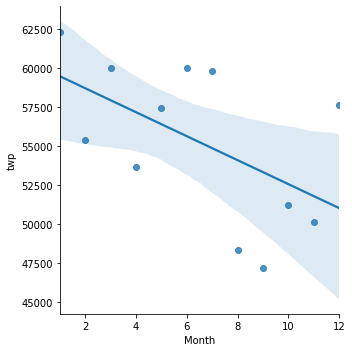

In [54]:
byMonth.reset_index()
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

<h4>Create a new column called 'Date' that contains the date from the timeStamp column. you'll need to use apply along with the .date() method </h4>

In [56]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,Thu,2015-12-10


<h4> Now groupby this Date column with the count() aggregate and create aplot of counts of 911 calls</h4>

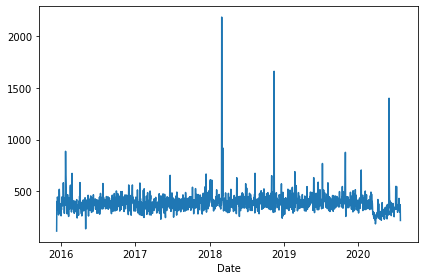

In [61]:
df.groupby('Date').count()['lat'].plot()
plt.tight_layout()

<h4> Now create plot for 3 reasons for 911 calls</h4>

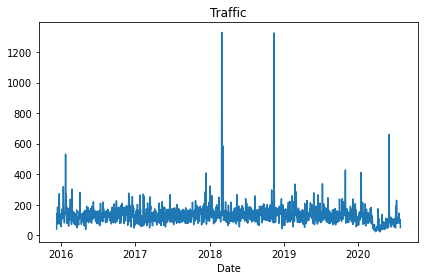

In [62]:
df[df['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

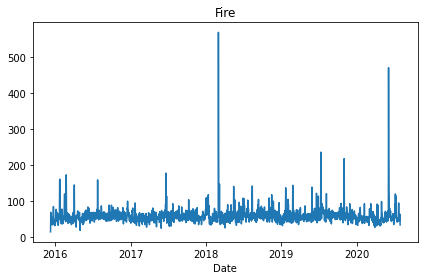

In [63]:
df[df['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

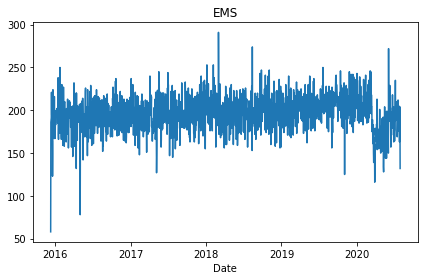

In [64]:
df[df['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

<h4> Creating heatmaps with seaborn and our data. we'll first need to restructure the dataframe so that the columns become the hours and index becomes the Day of the Week. There are lots of ways to do this, but i would recommend trying to combine groupby with an unstack method</h4>

In [79]:
dayHour=df.groupby(by=['Day of Week','hour']).count()['Reason'].unstack()

<h4> Now create a Heatmap using dayHour object</h4>

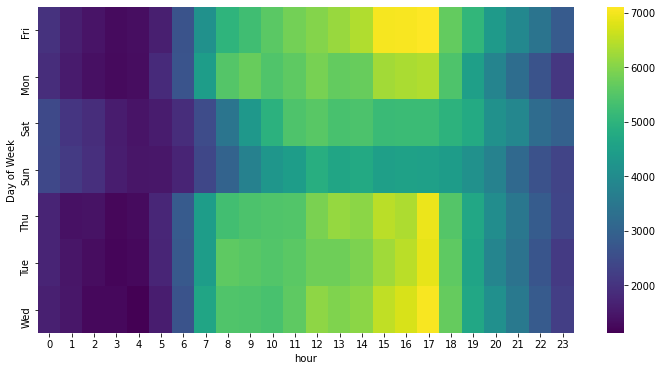

In [80]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

<h4> Now create a clustermap using dayHour object</h4>

<Figure size 864x432 with 0 Axes>

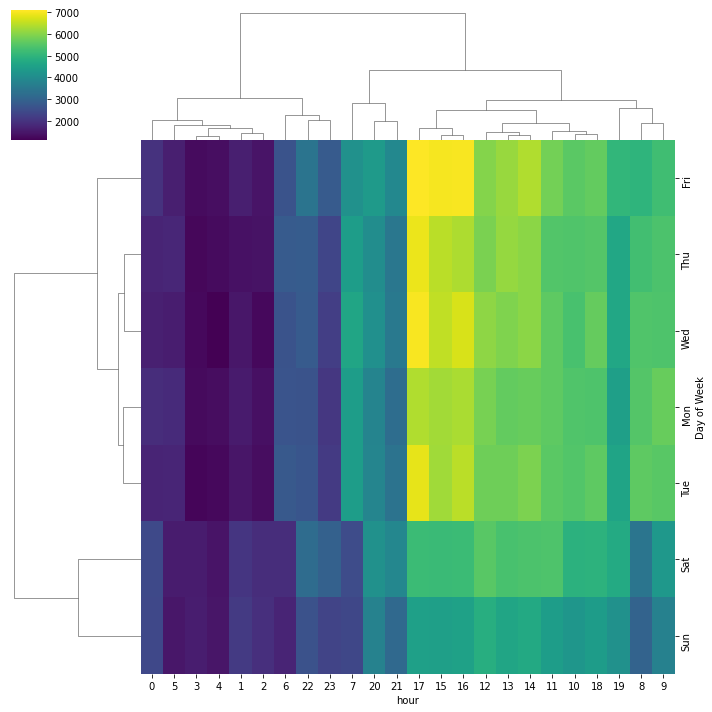

In [81]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour,cmap='viridis')

<h4> Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.</h4>


In [82]:
dayMonth=df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7997,8904,9207,8681,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8410,7881,8511,9499,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7514,7223,8198,7748,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6865,6694,6837,7859,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7722,8740,9489,8378,7508,6954,7482,8358,8151


<h4> Now create a heatmap using dayMonth object</h4>

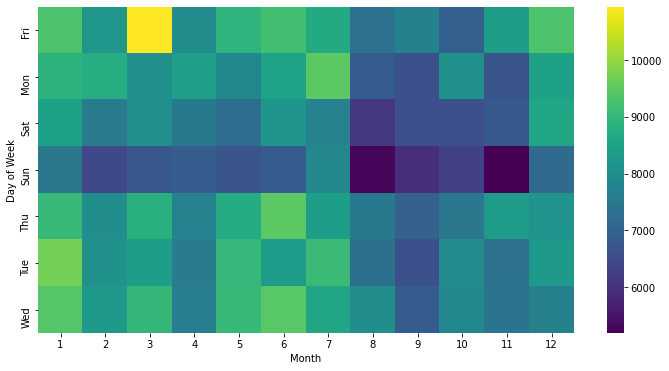

In [85]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

<h4> Now create a clustermap using dayMonth object</h4>

<Figure size 864x432 with 0 Axes>

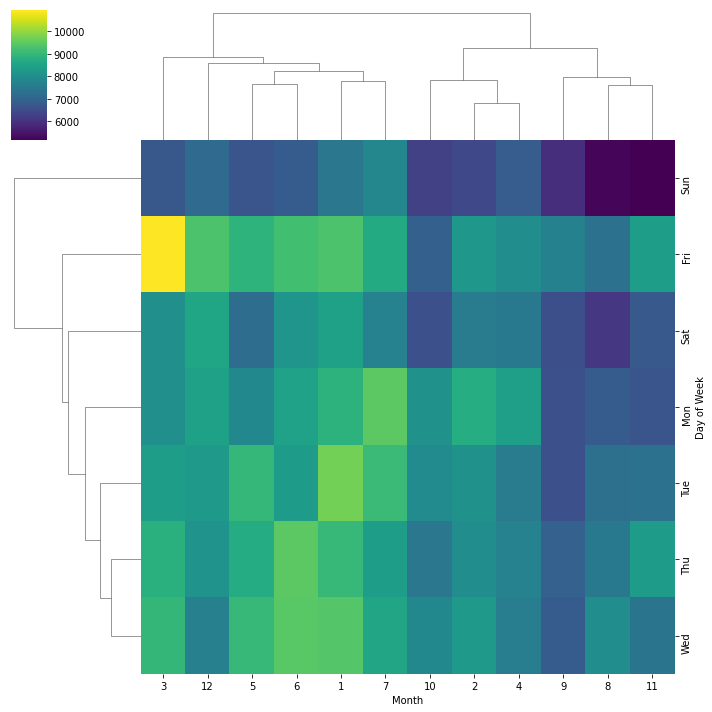

In [87]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth,cmap='viridis')
#coolwarm